In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Create a sample signal with three frequencies
t = np.linspace(0, 1, 500, False)  # 1 second
sig = 1*np.cos(2*np.pi*10*t) +2* np.sin(2*np.pi*30*t) +10* np.sin(2*np.pi*50*t)

# Compute the Fast Fourier Transform (FFT)
fft = np.fft.rfft(sig)
# print(fft.shape)
mag = np.abs(fft)
print(mag)
# Compute the magnitudes of the FFT
mag_before = np.abs(fft)

# Compute the frequencies associated with the FFT
freqs = np.fft.fftfreq(len(fft))

# Define the gains for the four sliders
# (In a real application, these would be controlled by the user)
gains = [1,6,1]  # Change these values to see the effect

# Divide the positive frequency range into four parts
freq_ranges = np.linspace(0, max(freqs), 4)
for i in range(3):
    # Find the indices of the FFT coefficients that correspond to this frequency range
    idx = np.where((freqs >= freq_ranges[i]) & (freqs < freq_ranges[i+1]))
    window = signal.windows.boxcar(len(idx[0]))

    # Apply the gain to these coefficients
    fft[idx] *= window*gains[i]

    # Also apply the gain to the corresponding negative frequencies
    idx_neg = np.where((freqs >= -freq_ranges[i+1]) & (freqs < -freq_ranges[i]))
    fft[idx_neg] *= gains[i]

# Now we can reconstruct the signal with the equalizer applied
equalized_sig = np.fft.ifft(fft)

# Compute the magnitudes of the equalized FFT
mag_after = np.abs(fft)

# Let's plot the original and equalized signal in separate subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

# Original signal in time domain
axs[0].plot(t, sig)
axs[0].set(xlabel='Time [s]', ylabel='Amplitude')
axs[0].set_title('Original Signal')

# Original signal FFT magnitude
axs[1].plot(freqs, mag_before)
axs[1].set(xlabel='Frequency [Hz]', ylabel='Magnitude')
axs[1].set_title('Original FFT Magnitude')

# Equalized signal in time domain
axs[2].plot(t, np.real(equalized_sig))
axs[2].set(xlabel='Time [s]', ylabel='Amplitude')
axs[2].set_title('Equalized Signal')

# Equalized signal FFT magnitude
axs[3].plot(freqs, mag_after)
axs[3].set(xlabel='Frequency [Hz]', ylabel='Magnitude')
axs[3].set_title('Equalized FFT Magnitude')

plt.tight_layout()
plt.show()



[1.52322599e-12 1.08975475e-12 2.06721671e-12 5.68675538e-13
 1.97858677e-12 1.37291820e-12 3.17138926e-12 1.28348256e-12
 1.23964334e-12 2.11506865e-12 2.50000000e+02 2.33729517e-12
 1.20923321e-12 1.79841598e-12 1.54637448e-12 1.59778858e-12
 1.14641481e-12 2.17737131e-12 1.68444895e-12 1.99455259e-12
 1.58094094e-12 2.91560961e-12 2.21003537e-12 2.10628248e-12
 1.28135682e-12 1.05505980e-12 2.02544177e-12 1.64551613e-12
 1.15207602e-12 1.15608765e-12 5.00000000e+02 3.10375572e-12
 1.41395978e-12 2.83134276e-12 1.41855505e-12 3.10418595e-12
 1.67845372e-12 1.50211120e-12 1.75321243e-12 1.43421029e-12
 3.60517179e-13 3.69047694e-12 5.08818070e-12 5.08733373e-12
 8.15514305e-13 9.08926712e-13 8.35494338e-13 6.18435229e-13
 1.98285752e-12 2.25834200e-12 2.50000000e+03 2.95092478e-12
 1.59823647e-12 2.11341366e-12 1.57510361e-12 1.56557873e-12
 1.01367634e-12 3.15209378e-12 5.14699448e-12 2.48389472e-12
 5.26715037e-13 1.73223033e-12 1.08518877e-12 2.24748673e-12
 1.80126143e-12 3.830382

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

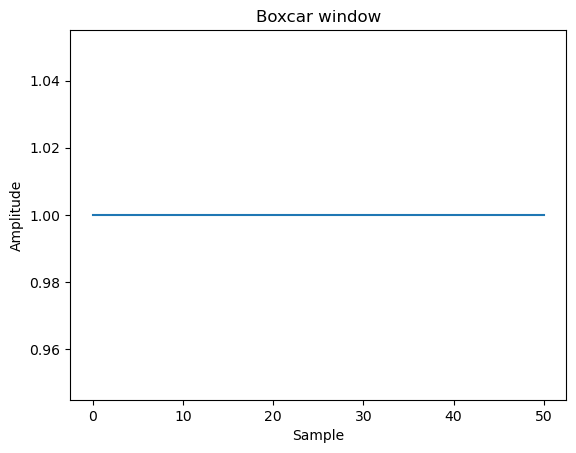

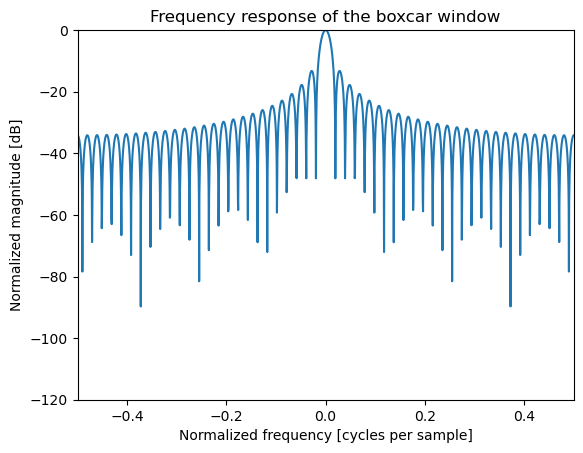

In [4]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
window = signal.windows.boxcar(51)
plt.plot(window)
plt.title("Boxcar window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the boxcar window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

In [26]:
import numpy as np

# Create a simple signal
t = np.linspace(0, 1, 500, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

fft_result = np.fft.rfft(sig) / len(sig)
magnitudes = np.abs(fft_result) * 2

# Compute the frequency bins
frequencies = np.fft.rfftfreq(sig.size, d=t[1] - t[0])

#Now you can inspect/plot the magnitudes
for freq, mag in zip(frequencies, magnitudes):
    print("Frequency: {:.2f}, Magnitude: {:.2f}".format(freq, mag))

Frequency: 0.00, Magnitude: 0.00
Frequency: 1.00, Magnitude: 0.00
Frequency: 2.00, Magnitude: 0.00
Frequency: 3.00, Magnitude: 0.00
Frequency: 4.00, Magnitude: 0.00
Frequency: 5.00, Magnitude: 0.00
Frequency: 6.00, Magnitude: 0.00
Frequency: 7.00, Magnitude: 0.00
Frequency: 8.00, Magnitude: 0.00
Frequency: 9.00, Magnitude: 0.00
Frequency: 10.00, Magnitude: 1.00
Frequency: 11.00, Magnitude: 0.00
Frequency: 12.00, Magnitude: 0.00
Frequency: 13.00, Magnitude: 0.00
Frequency: 14.00, Magnitude: 0.00
Frequency: 15.00, Magnitude: 0.00
Frequency: 16.00, Magnitude: 0.00
Frequency: 17.00, Magnitude: 0.00
Frequency: 18.00, Magnitude: 0.00
Frequency: 19.00, Magnitude: 0.00
Frequency: 20.00, Magnitude: 1.00
Frequency: 21.00, Magnitude: 0.00
Frequency: 22.00, Magnitude: 0.00
Frequency: 23.00, Magnitude: 0.00
Frequency: 24.00, Magnitude: 0.00
Frequency: 25.00, Magnitude: 0.00
Frequency: 26.00, Magnitude: 0.00
Frequency: 27.00, Magnitude: 0.00
Frequency: 28.00, Magnitude: 0.00
Frequency: 29.00, Magnit

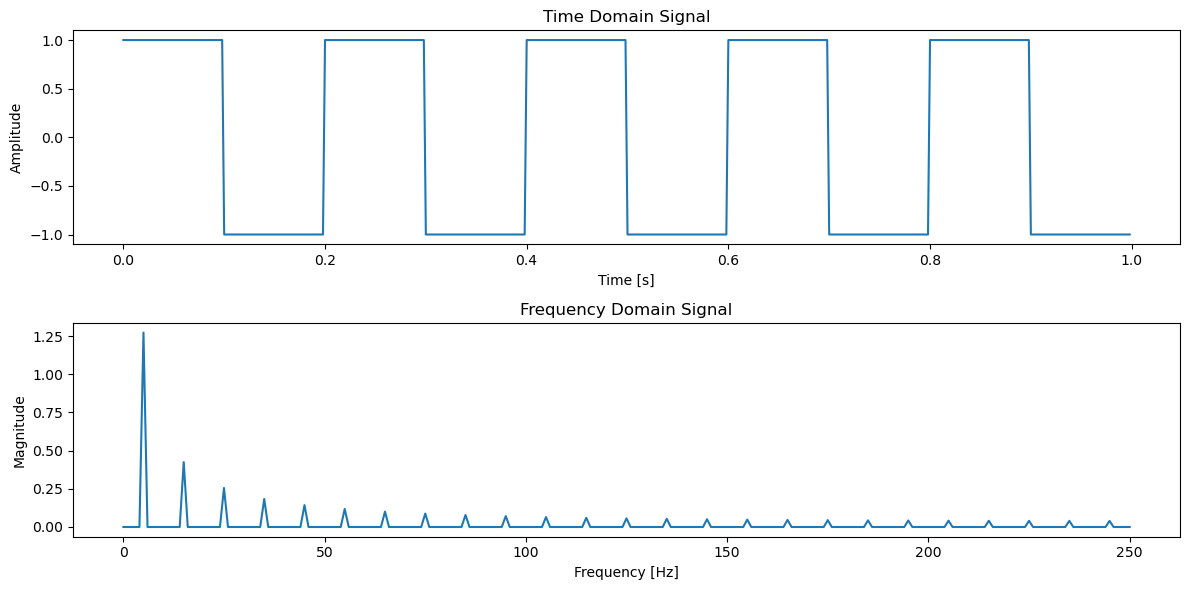

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# Time array
t = np.linspace(0, 1, 500, endpoint=False)

# Generate square wave
sig = square(2 * np.pi * 5 * t)

# Create a simple signal
n_samples= len(sig)
sampling_rate= t[1] - t[0]
# Compute the positive-frequency terms with rfft 
fft_result = np.fft.rfft(sig) / n_samples

# Compute the magnitudes 
magnitudes = np.abs(fft_result) * 2

# Compute the frequency bins
frequencies = np.fft.rfftfreq(sig.size, sampling_rate)

#change magnitudes
magnitudes[0] *=4
magnitudes[1] *=2
sig_2=np.fft.irfft(fft_result)

# Create a figure
plt.figure(figsize=(12, 6))

# Subplot for the time domain signal
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Subplot for the frequency domain signal
plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitudes)
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Layout the plots
plt.tight_layout()
plt.show()

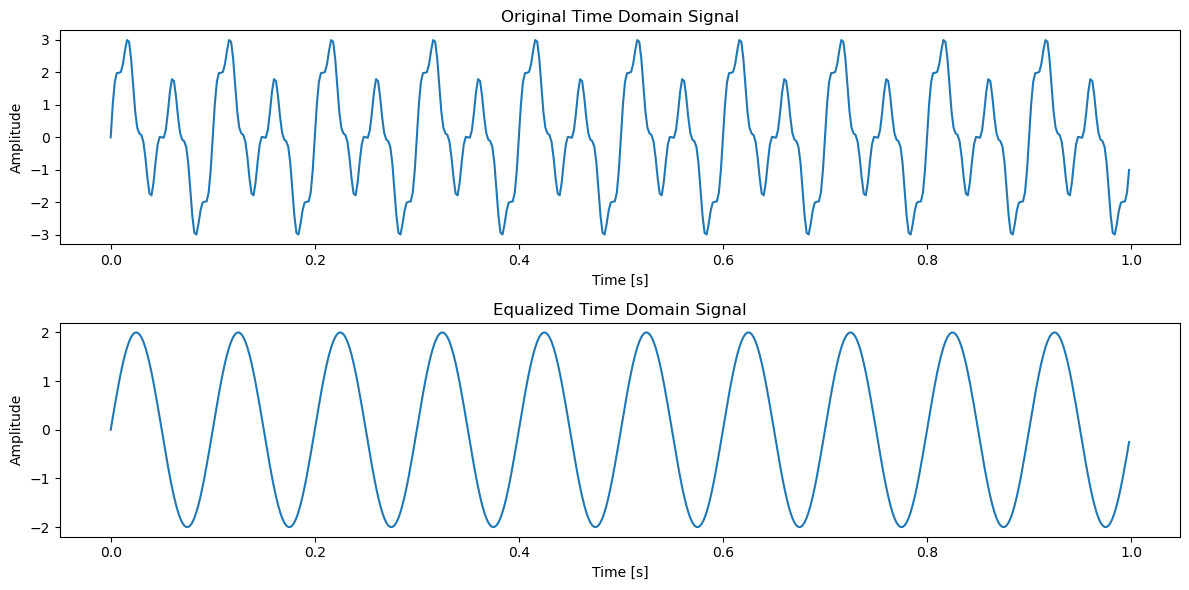

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple signal
t = np.linspace(0, 1, 500, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + 2*np.sin(2*np.pi*20*t) + 0.5*np.sin(2*np.pi*70*t)

# Compute the positive-frequency terms with rfft 
fft_result = np.fft.rfft(sig) / len(sig)

# Compute the magnitudes and phases
magnitudes = np.abs(fft_result) * 2
phases = np.angle(fft_result)

# Modify the magnitudes
magnitudes[10] *= 1  # Increase the amplitude of the 10 Hz component
magnitudes[20] *= 0# Increase the amplitude of the 20 Hz component
magnitudes[70] *= 0  # Increase the amplitude of the 70 Hz component

# Create a new fft result with modified magnitudes and original phases
new_fft_result = magnitudes * np.exp(1j * phases)

# Use irfft to move back to time domain
sig_2 = np.fft.irfft(new_fft_result * len(sig))  # Scale by len(sig) because of the earlier scaling

# Compute the frequency bins for the original signal
frequencies = np.fft.rfftfreq(sig.size, d=t[1] - t[0])

# Create a figure
plt.figure(figsize=(12, 6))

# Subplot for the original time domain signal
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.title('Original Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Subplot for the equalized signal
plt.subplot(2, 1, 2)
plt.plot(t, sig_2)
plt.title('Equalized Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Layout the plots
plt.tight_layout()
plt.show()

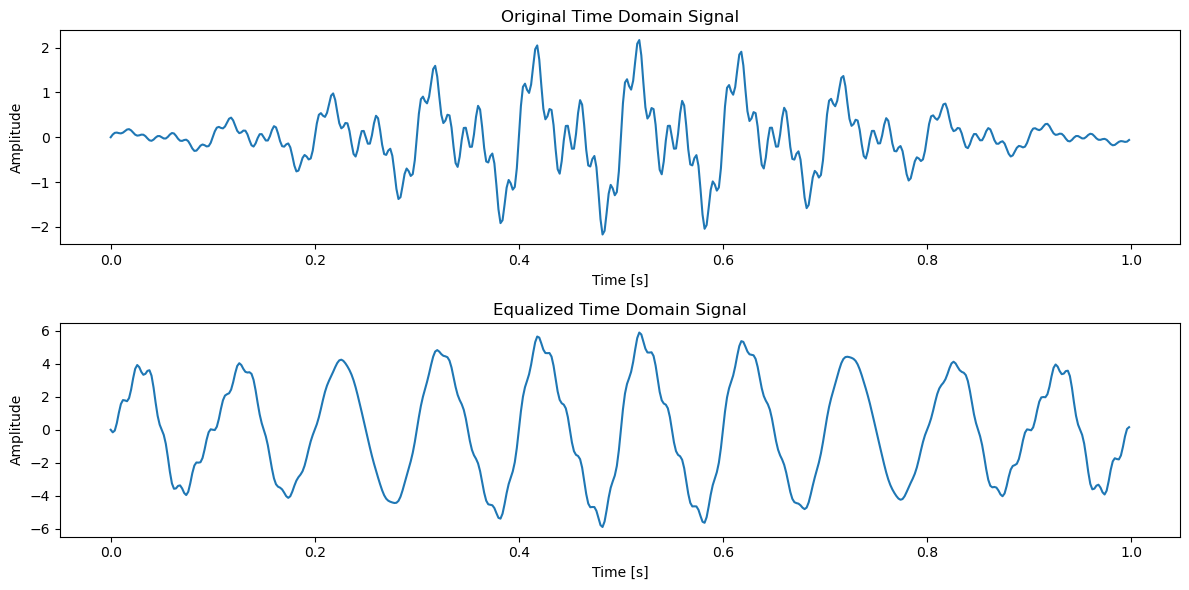

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple signal
t = np.linspace(0, 1, 500, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)  + 0.5*np.sin(2*np.pi*70*t)

# Apply a Hamming window
window = signal.windows.hamming(len(sig))
sig = sig * window

# Compute the positive-frequency terms with rfft 
fft_result = np.fft.rfft(sig) / len(sig)

# Compute the magnitudes and phases
magnitudes = np.abs(fft_result) * 2
phases = np.angle(fft_result)

# Modify the magnitudes
magnitudes[10] *= 4  # Increase the amplitude of the 10 Hz component
magnitudes[20] *= 0 # Increase the amplitude of the 20 Hz component
magnitudes[70] *= 0  # Increase the amplitude of the 70 Hz component

# Create a new fft result with modified magnitudes and original phases
new_fft_result = magnitudes * np.exp(1j * phases)

# Use irfft to move back to time domain
sig_2 = np.fft.irfft(new_fft_result * len(sig))  # Scale by len(sig) because of the earlier scaling

# Compute the frequency bins for the original signal
frequencies = np.fft.rfftfreq(sig.size, d=t[1] - t[0])

# Create a figure
plt.figure(figsize=(12, 6))

# Subplot for the original time domain signal
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.title('Original Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Subplot for the equalized signal
plt.subplot(2, 1, 2)
plt.plot(t, sig_2)
plt.title('Equalized Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Layout the plots
plt.tight_layout()
plt.show()

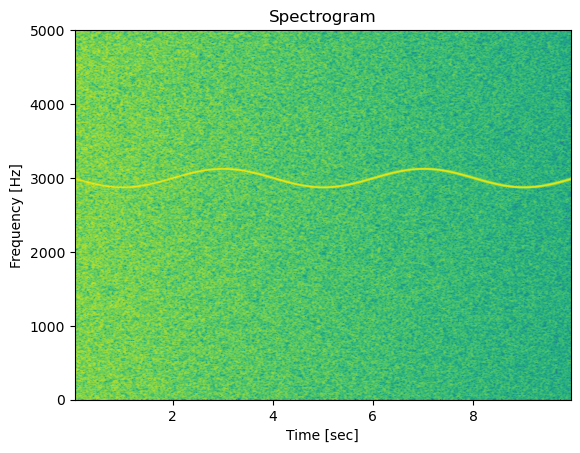

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal
Fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * Fs / 2
time = np.arange(N) / float(Fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

# Plot the spectrogram
plt.specgram(x, NFFT=1024, Fs=Fs, noverlap=900)
plt.title('Spectrogram')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()